In [11]:
using Pkg; Pkg.add("GR");

   Resolving package versions...
  No Changes to `/Applications/Julia-1.8.app/.julia_commun_a_tous/environments/v1.8/Project.toml`
  No Changes to `/Applications/Julia-1.8.app/.julia_commun_a_tous/environments/v1.8/Manifest.toml`


In [19]:
using Plots

In [136]:
struct Client
    position
    demand
end;
client1 = Client([0,10], 25)

Client([0, 10], 25)

In [137]:
function random_client(pos_range, demande_range)
    position = rand(pos_range, (1, 2))
    demand = rand(demande_range, 1)
    client = Client(position, demand[1])
    return client
end;
client1 = random_client(1:100, 15:30);

In [138]:
struct CVRP_Problem
    clients
    depot
    m
    Q
end;

In [139]:
function random_instance(n_clients, depot, m, Q)
    clients = Dict([(i,random_client(0:100, 10:30)) for i in    1:n_clients])
    problem = CVRP_Problem(clients, depot, m , Q)
    return problem
end;

In [140]:
function display_problem(problem)
    x_pos = [c.position[1] for c in values(problem.clients)]
    y_pos = [c.position[2] for c in values(problem.clients)]
    Plots.scatter(x_pos, y_pos, shape = :circle, markersize = 6, label= "Client")
    Plots.scatter!([problem.depot[1]], [problem.depot[2]], shape = :square, markersize = 8, label= "Depot")
end;


In [469]:
problem=random_instance(6, [20.,10.] ,3,30)

CVRP_Problem(Dict{Int64, Client}(5 => Client([87 91], 27), 4 => Client([81 72], 13), 6 => Client([81 94], 11), 2 => Client([22 98], 18), 3 => Client([3 92], 19), 1 => Client([52 60], 27)), [20.0, 10.0], 3, 30)

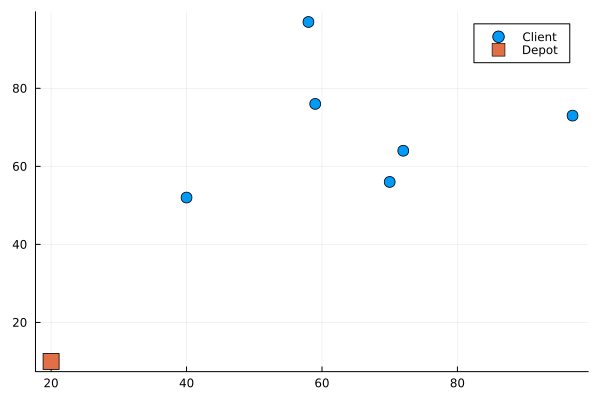

In [464]:
display_problem(problem)

In [143]:
function delta(problem, S, x)
    L = []
    x_sep=[for ]
    for i in S
        for j in 0:length(problem.clients)
            if !(j in S)
                i_min = min(i,j)
                i_max = max(i,j)
                if !(x[i_min,i_max] in L)
                    append!(L, [x[i_min,i_max]]);
                end;
            end;
        end;
    end;
    return L
end;

In [343]:
function demand_s(problem, S)
    d = 0;
    println("but")
    for c in S
        println("c",c,S)
        d = d + problem.clients[c].demand;
    end;
    return d;
end;

In [447]:
function delta_cb(problem, S, x,cb_data)
    L = []
    println("why")
    x_sep=[[ callback_value(cb_data, x[i,j]) for j = i+1:n ] for i in 1:n]
    for i in S
        for j in 1:length(problem.clients)
            println("why")
            println(j,S,!(j in S))
            if !(j in S)
                println("there")
                println(min(i,j))
                i_min = min(i,j)
                i_max = max(i,j)
                i_max-=i_min
                #println("v",i_min,i_max,value(x[1,2])==1)
                #println("v",value(x[i_min,i_max]))
                println("huang")
                println(i_min,i_max)
                println(x_sep[i_min][i_max])
                if !(x_sep[i_min][i_max] in L)
                    println("xin")
                    append!(L, [ (x_sep[i_min][i_max])]);
                end;
            end;
        end;
    end;
    println("L",L)
    return L
end;

In [451]:
function W(problem, x, cs, cb_data)
    L = sum(delta_cb(problem, cs, x, cb_data))
    println("problem.Q",problem.Q)
    #println("demande",demand_s(problem, cs))
    println("hhhh",L,2*ceil(demand_s(problem, cs)/problem.Q))
    return L - 2*ceil(demand_s(problem, cs)/problem.Q)
    #return L - 2*(demand_s(problem, cs)/problem.Q)
end;

In [379]:
Pkg.add("LightGraphsFlows")

   Resolving package versions...
  No Changes to `/Applications/Julia-1.8.app/.julia_commun_a_tous/environments/v1.8/Project.toml`
  No Changes to `/Applications/Julia-1.8.app/.julia_commun_a_tous/environments/v1.8/Manifest.toml`


In [380]:
using LightGraphsFlows
import LightGraphs
const lg = LightGraphs

LightGraphs

In [381]:
include("LightGraph.jl")

LoadError: SystemError: opening file "/Users/xinyuhuangmac/Google Drive/M2S1/MAOA/projet_PDI_probleme/LightGraph.jl": No such file or directory

In [382]:
function build_simple_graph(problem, x)
    g = SimpleGraph(length(problem.clients));
    for i in 0:nv(g)
        for j in i+1:nv(g)
            if(value(x[i,j]) == 1)
                 add_edge!(g, i, j)
            end;
        end;
     end;
     return g;
end;

In [383]:
cvrp = Model(GLPK.Optimizer)
n = length(problem.clients)
x = @variable(cvrp,x[i= 0:n, j = i+1:n ],Int)
set_optimizer_attribute(cvrp,"msg_lev",GLPK.GLP_MSG_ALL)

optimize!(cvrp)



GLPK Simplex Optimizer 5.0
0 rows, 21 columns, 0 non-zeros
~     0: obj =   0.000000000e+00  infeas =  0.000e+00
OPTIMAL SOLUTION FOUND
GLPK Integer Optimizer 5.0
0 rows, 21 columns, 0 non-zeros
21 integer variables, none of which are binary
Integer optimization begins...
Long-step dual simplex will be used
+     0: mip =     not found yet >=              -inf        (1; 0)
+     0: >>>>>   0.000000000e+00 >=   0.000000000e+00   0.0% (1; 0)
+     0: mip =   0.000000000e+00 >=     tree is empty   0.0% (0; 1)
INTEGER OPTIMAL SOLUTION FOUND


In [232]:
g=build_simple_graph(problem,x)



LoadError: OptimizeNotCalled()

In [54]:
import Pkg; Pkg.add("GLPK")

   Resolving package versions...
   Installed GLPK_jll ─ v5.0.1+0
   Installed GLPK ───── v1.1.0
    Updating `/Applications/Julia-1.8.app/.julia_commun_a_tous/environments/v1.8/Project.toml`
  [60bf3e95] + GLPK v1.1.0
    Updating `/Applications/Julia-1.8.app/.julia_commun_a_tous/environments/v1.8/Manifest.toml`
  [60bf3e95] + GLPK v1.1.0
  [e8aa6df9] + GLPK_jll v5.0.1+0
  [781609d7] + GMP_jll v6.2.1+2
Precompiling project...
  ✓ GMP_jll
  ✓ GLPK_jll
  ✓ GLPK
  3 dependencies successfully precompiled in 8 seconds. 166 already precompiled. 1 skipped during auto due to previous errors.


In [150]:
using JuMP
using GLPK
using Graphs

In [428]:
function build_simple_graph_cb(problem, x, cb_data)
    #    println("here")
    x_sep=[[ callback_value(cb_data, x[i,j]) for j = i+1:n ] for i in 1:n]
    #    println("here")
    g = SimpleGraph(length(problem.clients));
    #=for i in 1:n-1
        for j in i+1:n
            println("hi",i,j)=#
    println(x_sep)
    for i in 1:n
        for j in 1:n-i
            println("here")
            println(i,j)
            if(value(x_sep[i][j] == 1))
            #if(value(x_sep[i][j]) == 1)
                #println("in")
                 add_edge!(g, i, j)
            end;
        end;
     end;
     return g;
end;

In [465]:
cvrp = Model(GLPK.Optimizer)
n = length(problem.clients)
x = @variable(cvrp,x[i= 0:n, j = i+1:n ],Int)
for i in 0:n
    for j in i+1:n
        if( i == 0)
            c = @constraint(cvrp, 0 <= x[i,j] <= 2)
        else
            c= @constraint(cvrp, 0 <= x[i,j] <= 1)
        end;
    end;
end;
c= @constraint(cvrp, sum(delta(problem, [0], x)) == 2*problem.m )
for i in 1:n
    δ = delta(problem, [i], x)
    if(length(δ) == 0)
        continue
    end;
    c = @constraint(cvrp, sum(δ) == 2 )
end;
obj_coef = []
for i in 0:n
    for j in i+1:n
        #append!(obj_coef, [get_cost(problem, i, j) * x[i,j] ] )
        append!(obj_coef, [1 * x[i,j] ] )
    end;
end;
@objective(cvrp,Min,sum(obj_coef))
function ressource_constraints(cb_data)
    status = callback_node_status(cb_data, cvrp)
    if(status == MOI.CALLBACK_NODE_STATUS_INTEGER)
        g = build_simple_graph_cb(problem, x, cb_data)
        comp = connected_components(g)
        for c in comp
            print("hiiii")
             f = W(problem, x,c, cb_data);
            print("lalala")
             if(f <0 )
                 con = @build_constraint(sum(delta(problem, c, x)) >=2*ceil(demand_s(problem, c)/problem.Q))
                 MOI.submit(cvrp, MOI.LazyConstraint(cb_data), con)
             end;
         end;
     end;
end;
MOI.set(cvrp, MOI.LazyConstraintCallback(), ressource_constraints);

In [470]:
set_optimizer_attribute(cvrp,"msg_lev",GLPK.GLP_MSG_ALL)
optimize!(cvrp)
#termination_status(cvrp)
#objective_value(cvrp)

GLPK Simplex Optimizer 5.0
28 rows, 42 columns, 84 non-zeros
*    36: obj =   9.000000000e+00 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
GLPK Integer Optimizer 5.0
28 rows, 42 columns, 84 non-zeros
21 integer variables, none of which are binary
Integer optimization begins...
Long-step dual simplex will be used
+    36: mip =     not found yet >=              -inf        (1; 0)
Vector[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [1.0, 1.0], [1.0], Any[]]
here
11
here
12
here
13
here
14
here
15
here
21
here
22
here
23
here
24
here
31
here
32
here
33
here
41
here
42
here
51
hiiiiwhy
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
1
huang
12
0.0
xin
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
1
huang
15
0.0
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
2
huang
21
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
2
huang
24
0.0
why
1[1, 2, 4, 5]false
why


Vector[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [1.0, 1.0], [1.0], Any[]]
here
11
here
12
here
13
here
14
here
15
here
21
here
22
here
23
here
24
here
31
here
32
here
33
here
41
here
42
here
51
hiiiiwhy
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
1
huang
12
0.0
xin
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
1
huang
15
0.0
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
2
huang
21
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
2
huang
24
0.0
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
31
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
4
huang
42
1.0
xin
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
32
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
5
huang
51
1.0
LAny[0.0, 1.0]
problem.Q30
but
c1[1, 2, 4, 5]
c2[1, 

Vector[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [1.0, 1.0], [1.0], Any[]]
here
11
here
12
here
13
here
14
here
15
here
21
here
22
here
23
here
24
here
31
here
32
here
33
here
41
here
42
here
51
hiiiiwhy
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
1
huang
12
0.0
xin
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
1
huang
15
0.0
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
2
huang
21
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
2
huang
24
0.0
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
31
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
4
huang
42
1.0
xin
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
32
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
5
huang
51
1.0
LAny[0.0, 1.0]
problem.Q30
but
c1[1, 2, 4, 5]
c2[1, 

42
1.0
xin
why
5[6]true
there
5
huang
51
1.0
why
6[6]false
LAny[0.0, 1.0]
problem.Q30
but
c6[6]
hhhh1.02.0
but
c6[6]
lalalabut
c6[6]
Vector[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [1.0, 1.0], [1.0], Any[]]
here
11
here
12
here
13
here
14
here
15
here
21
here
22
here
23
here
24
here
31
here
32
here
33
here
41
here
42
here
51
hiiiiwhy
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
1
huang
12
0.0
xin
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
1
huang
15
0.0
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
2
huang
21
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
2
huang
24
0.0
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
31
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
4
huang
42
1.0
xin
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
32
0.0
why
4[1,

c5[1, 2, 4, 5]
lalalabut
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hiiiiwhy
why
1[3]true
there
1
huang
12
0.0
xin
why
2[3]true
there
2
huang
21
0.0
why
3[3]false
why
4[3]true
there
3
huang
31
0.0
why
5[3]true
there
3
huang
32
0.0
why
6[3]true
there
3
huang
33
0.0
LAny[0.0]
problem.Q30
but
c3[3]
hhhh0.02.0
but
c3[3]
lalalabut
c3[3]
hiiiiwhy
why
1[6]true
there
1
huang
15
0.0
xin
why
2[6]true
there
2
huang
24
0.0
why
3[6]true
there
3
huang
33
0.0
why
4[6]true
there
4
huang
42
1.0
xin
why
5[6]true
there
5
huang
51
1.0
why
6[6]false
LAny[0.0, 1.0]
problem.Q30
but
c6[6]
hhhh1.02.0
but
c6[6]
lalalabut
c6[6]
Vector[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [1.0, 1.0], [1.0], Any[]]
here
11
here
12
here
13
here
14
here
15
here
21
here
22
here
23
here
24
here
31
here
32
here
33
here
41
here
42
here
51
hiiiiwhy
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
1
huang
12
0.0
xin
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1

why
3[1, 2, 4, 5]true
there
2
huang
21
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
2
huang
24
0.0
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
31
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
4
huang
42
1.0
xin
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
32
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
5
huang
51
1.0
LAny[0.0, 1.0]
problem.Q30
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hhhh1.06.0
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
lalalabut
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hiiiiwhy
why
1[3]true
there
1
huang
12
0.0
xin
why
2[3]true
there
2
huang
21
0.0
why
3[3]false
why
4[3]true
there
3
huang
31
0.0
why
5[3]true
there
3
huang
32
0.0
why
6[3]true
there
3
huang
33
0.0
LAny[0.0]
problem.Q30
but
c3[3]
hhhh0.02.0
but
c3[3]
lalalabut
c3[3]
hiiiiw

3[1, 2, 4, 5]true
there
1
huang
12
0.0
xin
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
1
huang
15
0.0
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
2
huang
21
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
2
huang
24
0.0
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
31
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
4
huang
42
1.0
xin
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
32
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
5
huang
51
1.0
LAny[0.0, 1.0]
problem.Q30
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hhhh1.06.0
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
lalalabut
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hiiiiwhy
why
1[3]true
there
1
huang
12
0.0
xin
why
2[3]true
there
2
huang
21
0.0
why
3[3]false

4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
2
huang
24
0.0
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
31
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
4
huang
42
1.0
xin
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
32
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
5
huang
51
1.0
LAny[0.0, 1.0]
problem.Q30
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hhhh1.06.0
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
lalalabut
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hiiiiwhy
why
1[3]true
there
1
huang
12
0.0
xin
why
2[3]true
there
2
huang
21
0.0
why
3[3]false
why
4[3]true
there
3
huang
31
0.0
why
5[3]true
there
3
huang
32
0.0
why
6[3]true
there
3
huang
33
0.0
LAny[0.0]
problem.Q30
but
c3[3]
hhhh0.02.0
but
c3[3]
lalalabut
c3[3]
hiiiiwhy
why
1[6]true
there
1
huang
15
0.0
xin
why
2[

6[1, 2, 4, 5]true
there
1
huang
15
0.0
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
2
huang
21
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
2
huang
24
0.0
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
31
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
4
huang
42
1.0
xin
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
32
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
5
huang
51
1.0
LAny[0.0, 1.0]
problem.Q30
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hhhh1.06.0
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
lalalabut
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hiiiiwhy
why
1[3]true
there
1
huang
12
0.0
xin
why
2[3]true
there
2
huang
21
0.0
why
3[3]false
why
4[3]true
there
3
huang
31
0.0
why
5[3]true
there
3
huang
32
0.0
why
6[3]true
there
3
hua

c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
lalalabut
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hiiiiwhy
why
1[3]true
there
1
huang
12
0.0
xin
why
2[3]true
there
2
huang
21
0.0
why
3[3]false
why
4[3]true
there
3
huang
31
0.0
why
5[3]true
there
3
huang
32
0.0
why
6[3]true
there
3
huang
33
0.0
LAny[0.0]
problem.Q30
but
c3[3]
hhhh0.02.0
but
c3[3]
lalalabut
c3[3]
hiiiiwhy
why
1[6]true
there
1
huang
15
0.0
xin
why
2[6]true
there
2
huang
24
0.0
why
3[6]true
there
3
huang
33
0.0
why
4[6]true
there
4
huang
42
1.0
xin
why
5[6]true
there
5
huang
51
1.0
why
6[6]false
LAny[0.0, 1.0]
problem.Q30
but
c6[6]
hhhh1.02.0
but
c6[6]
lalalabut
c6[6]
Vector[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [1.0, 1.0], [1.0], Any[]]
here
11
here
12
here
13
here
14
here
15
here
21
here
22
here
23
here
24
here
31
here
32
here
33
here
41
here
42
here
51
hiiiiwhy
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
1
huang
12
0.0
xin
why
4[1, 2, 4, 5]false


c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hiiiiwhy
why
1[3]true
there
1
huang
12
0.0
xin
why
2[3]true
there
2
huang
21
0.0
why
3[3]false
why
4[3]true
there
3
huang
31
0.0
why
5[3]true
there
3
huang
32
0.0
why
6[3]true
there
3
huang
33
0.0
LAny[0.0]
problem.Q30
but
c3[3]
hhhh0.02.0
but
c3[3]
lalalabut
c3[3]
hiiiiwhy
why
1[6]true
there
1
huang
15
0.0
xin
why
2[6]true
there
2
huang
24
0.0
why
3[6]true
there
3
huang
33
0.0
why
4[6]true
there
4
huang
42
1.0
xin
why
5[6]true
there
5
huang
51
1.0
why
6[6]false
LAny[0.0, 1.0]
problem.Q30
but
c6[6]
hhhh1.02.0
but
c6[6]
lalalabut
c6[6]
Vector[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [1.0, 1.0], [1.0], Any[]]
here
11
here
12
here
13
here
14
here
15
here
21
here
22
here
23
here
24
here
31
here
32
here
33
here
41
here
42
here
51
hiiiiwhy
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
1
huang
12
0.0
xin
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
1
hu

2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
2
huang
21
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
2
huang
24
0.0
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
31
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
4
huang
42
1.0
xin
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
32
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
5
huang
51
1.0
LAny[0.0, 1.0]
problem.Q30
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hhhh1.06.0
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
lalalabut
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hiiiiwhy
why
1[3]true
there
1
huang
12
0.0
xin
why
2[3]true
there
2
huang
21
0.0
why
3[3]false
why
4[3]true
there
3
huang
31
0.0
why
5[3]true
there
3
huang
32
0.0
why
6[3]true
there
3
huang
33
0.0
LAny[0.0]
problem.Q30
but
c3[3]
hhhh0.02.0
but
c3[3]
lal

c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hhhh1.06.0
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
lalalabut
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hiiiiwhy
why
1[3]true
there
1
huang
12
0.0
xin
why
2[3]true
there
2
huang
21
0.0
why
3[3]false
why
4[3]true
there
3
huang
31
0.0
why
5[3]true
there
3
huang
32
0.0
why
6[3]true
there
3
huang
33
0.0
LAny[0.0]
problem.Q30
but
c3[3]
hhhh0.02.0
but
c3[3]
lalalabut
c3[3]
hiiiiwhy
why
1[6]true
there
1
huang
15
0.0
xin
why
2[6]true
there
2
huang
24
0.0
why
3[6]true
there
3
huang
33
0.0
why
4[6]true
there
4
huang
42
1.0
xin
why
5[6]true
there
5
huang
51
1.0
why
6[6]false
LAny[0.0, 1.0]
problem.Q30
but
c6[6]
hhhh1.02.0
but
c6[6]
lalalabut
c6[6]
Vector[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [1.0, 1.0], [1.0], Any[]]
here
11
here
12
here
13
here
14
here
15
here
21
here
22
here
23
here
24
here
31
here
32
here
33
here
41
here
42
here
51
hiiiiwhy
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]f

c6[6]
hhhh1.02.0
but
c6[6]
lalalabut
c6[6]
Vector[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [1.0, 1.0], [1.0], Any[]]
here
11
here
12
here
13
here
14
here
15
here
21
here
22
here
23
here
24
here
31
here
32
here
33
here
41
here
42
here
51
hiiiiwhy
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
1
huang
12
0.0
xin
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
1
huang
15
0.0
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
2
huang
21
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
2
huang
24
0.0
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
31
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
4
huang
42
1.0
xin
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
32
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
5
huang
51
1.0
LAny[0.0,

4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
5
huang
51
1.0
LAny[0.0, 1.0]
problem.Q30
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hhhh1.06.0
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
lalalabut
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hiiiiwhy
why
1[3]true
there
1
huang
12
0.0
xin
why
2[3]true
there
2
huang
21
0.0
why
3[3]false
why
4[3]true
there
3
huang
31
0.0
why
5[3]true
there
3
huang
32
0.0
why
6[3]true
there
3
huang
33
0.0
LAny[0.0]
problem.Q30
but
c3[3]
hhhh0.02.0
but
c3[3]
lalalabut
c3[3]
hiiiiwhy
why
1[6]true
there
1
huang
15
0.0
xin
why
2[6]true
there
2
huang
24
0.0
why
3[6]true
there
3
huang
33
0.0
why
4[6]true
there
4
huang
42
1.0
xin
why
5[6]true
there
5
huang
51
1.0
why
6[6]false
LAny[0.0, 1.0]
problem.Q30
but
c6[6]
hhhh1.02.0
but
c6[6]
lalalabut
c6[6]
Vector[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [1.0, 1.0], [1.0], Any[]]
here
11
here
12
here
13
here
14
here
15

xin
why
2[6]true
there
2
huang
24
0.0
why
3[6]true
there
3
huang
33
0.0
why
4[6]true
there
4
huang
42
1.0
xin
why
5[6]true
there
5
huang
51
1.0
why
6[6]false
LAny[0.0, 1.0]
problem.Q30
but
c6[6]
hhhh1.02.0
but
c6[6]
lalalabut
c6[6]
Vector[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [1.0, 1.0], [1.0], Any[]]
here
11
here
12
here
13
here
14
here
15
here
21
here
22
here
23
here
24
here
31
here
32
here
33
here
41
here
42
here
51
hiiiiwhy
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
1
huang
12
0.0
xin
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
1
huang
15
0.0
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
2
huang
21
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
2
huang
24
0.0
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
31
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
4
huang
42
1.0
xi

why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
2
huang
24
0.0
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
31
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
4
huang
42
1.0
xin
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
32
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
5
huang
51
1.0
LAny[0.0, 1.0]
problem.Q30
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hhhh1.06.0
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
lalalabut
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hiiiiwhy
why
1[3]true
there
1
huang
12
0.0
xin
why
2[3]true
there
2
huang
21
0.0
why
3[3]false
why
4[3]true
there
3
huang
31
0.0
why
5[3]true
there
3
huang
32
0.0
why
6[3]true
there
3
huang
33
0.0
LAny[0.0]
problem.Q30
but
c3[3]
hhhh0.02.0
but
c3[3]
lalalabut
c3[3]
hiiiiwhy
why
1[6]true
there
1
huang
15
0.0
xin
why
2[6]true
there
2
huan

why
3[1, 2, 4, 5]true
there
1
huang
12
0.0
xin
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
1
huang
15
0.0
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
2
huang
21
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
2
huang
24
0.0
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
31
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
4
huang
42
1.0
xin
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
32
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
5
huang
51
1.0
LAny[0.0, 1.0]
problem.Q30
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hhhh1.06.0
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
lalalabut
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hiiiiwhy
why
1[3]true
there
1
huang
12
0.0
xin
why
2[3]true
there
2
huang
21
0.0
why
3[3]f

3[1, 2, 4, 5]true
there
2
huang
21
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
2
huang
24
0.0
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
31
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
4
huang
42
1.0
xin
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
32
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
5
huang
51
1.0
LAny[0.0, 1.0]
problem.Q30
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hhhh1.06.0
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
lalalabut
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hiiiiwhy
why
1[3]true
there
1
huang
12
0.0
xin
why
2[3]true
there
2
huang
21
0.0
why
3[3]false
why
4[3]true
there
3
huang
31
0.0
why
5[3]true
there
3
huang
32
0.0
why
6[3]true
there
3
huang
33
0.0
LAny[0.0]
problem.Q30
but
c3[3]
hhhh0.02.0
but
c3[3]
lalalabut
c3[3]
hiiiiwhy
w

33
here
41
here
42
here
51
hiiiiwhy
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
1
huang
12
0.0
xin
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
1
huang
15
0.0
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
2
huang
21
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
2
huang
24
0.0
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
31
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
4
huang
42
1.0
xin
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
32
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
5
huang
51
1.0
LAny[0.0, 1.0]
problem.Q30
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hhhh1.06.0
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
lalalabut
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hiiiiwhy

c5[1, 2, 4, 5]
lalalabut
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hiiiiwhy
why
1[3]true
there
1
huang
12
0.0
xin
why
2[3]true
there
2
huang
21
0.0
why
3[3]false
why
4[3]true
there
3
huang
31
0.0
why
5[3]true
there
3
huang
32
0.0
why
6[3]true
there
3
huang
33
0.0
LAny[0.0]
problem.Q30
but
c3[3]
hhhh0.02.0
but
c3[3]
lalalabut
c3[3]
hiiiiwhy
why
1[6]true
there
1
huang
15
0.0
xin
why
2[6]true
there
2
huang
24
0.0
why
3[6]true
there
3
huang
33
0.0
why
4[6]true
there
4
huang
42
1.0
xin
why
5[6]true
there
5
huang
51
1.0
why
6[6]false
LAny[0.0, 1.0]
problem.Q30
but
c6[6]
hhhh1.02.0
but
c6[6]
lalalabut
c6[6]
Vector[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [1.0, 1.0], [1.0], Any[]]
here
11
here
12
here
13
here
14
here
15
here
21
here
22
here
23
here
24
here
31
here
32
here
33
here
41
here
42
here
51
hiiiiwhy
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
1
huang
12
0.0
xin
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1

1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
31
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
4
huang
42
1.0
xin
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
32
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
5
huang
51
1.0
LAny[0.0, 1.0]
problem.Q30
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hhhh1.06.0
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
lalalabut
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hiiiiwhy
why
1[3]true
there
1
huang
12
0.0
xin
why
2[3]true
there
2
huang
21
0.0
why
3[3]false
why
4[3]true
there
3
huang
31
0.0
why
5[3]true
there
3
huang
32
0.0
why
6[3]true
there
3
huang
33
0.0
LAny[0.0]
problem.Q30
but
c3[3]
hhhh0.02.0
but
c3[3]
lalalabut
c3[3]
hiiiiwhy
why
1[6]true
there
1
huang
15
0.0
xin
why
2[6]true
there
2
huang
24
0.0
why
3[6]true
there
3
huang
33
0.0
why
4[6]true
there
4
huang


Vector[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [1.0, 1.0], [1.0], Any[]]
here
11
here
12
here
13
here
14
here
15
here
21
here
22
here
23
here
24
here
31
here
32
here
33
here
41
here
42
here
51
hiiiiwhy
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
1
huang
12
0.0
xin
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
1
huang
15
0.0
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
2
huang
21
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
2
huang
24
0.0
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
31
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
4
huang
42
1.0
xin
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
32
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
5
huang
51
1.0
LAny[0.0, 1.0]
problem.Q30
but
c1[1, 2, 4, 5]
c2[1, 

5[3]true
there
3
huang
32
0.0
why
6[3]true
there
3
huang
33
0.0
LAny[0.0]
problem.Q30
but
c3[3]
hhhh0.02.0
but
c3[3]
lalalabut
c3[3]
hiiiiwhy
why
1[6]true
there
1
huang
15
0.0
xin
why
2[6]true
there
2
huang
24
0.0
why
3[6]true
there
3
huang
33
0.0
why
4[6]true
there
4
huang
42
1.0
xin
why
5[6]true
there
5
huang
51
1.0
why
6[6]false
LAny[0.0, 1.0]
problem.Q30
but
c6[6]
hhhh1.02.0
but
c6[6]
lalalabut
c6[6]
Vector[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [1.0, 1.0], [1.0], Any[]]
here
11
here
12
here
13
here
14
here
15
here
21
here
22
here
23
here
24
here
31
here
32
here
33
here
41
here
42
here
51
hiiiiwhy
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
1
huang
12
0.0
xin
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
1
huang
15
0.0
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
2
huang
21
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
2
huang
24
0.0
why


LAny[0.0]
problem.Q30
but
c3[3]
hhhh0.02.0
but
c3[3]
lalalabut
c3[3]
hiiiiwhy
why
1[6]true
there
1
huang
15
0.0
xin
why
2[6]true
there
2
huang
24
0.0
why
3[6]true
there
3
huang
33
0.0
why
4[6]true
there
4
huang
42
1.0
xin
why
5[6]true
there
5
huang
51
1.0
why
6[6]false
LAny[0.0, 1.0]
problem.Q30
but
c6[6]
hhhh1.02.0
but
c6[6]
lalalabut
c6[6]
Vector[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [1.0, 1.0], [1.0], Any[]]
here
11
here
12
here
13
here
14
here
15
here
21
here
22
here
23
here
24
here
31
here
32
here
33
here
41
here
42
here
51
hiiiiwhy
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
1
huang
12
0.0
xin
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
1
huang
15
0.0
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
2
huang
21
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
2
huang
24
0.0
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true


24
0.0
why
3[6]true
there
3
huang
33
0.0
why
4[6]true
there
4
huang
42
1.0
xin
why
5[6]true
there
5
huang
51
1.0
why
6[6]false
LAny[0.0, 1.0]
problem.Q30
but
c6[6]
hhhh1.02.0
but
c6[6]
lalalabut
c6[6]
+    36: mip =     not found yet >=   9.000000000e+00        (1; 0)
Vector[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [1.0, 1.0], [1.0], Any[]]
here
11
here
12
here
13
here
14
here
15
here
21
here
22
here
23
here
24
here
31
here
32
here
33
here
41
here
42
here
51
hiiiiwhy
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
1
huang
12
0.0
xin
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
1
huang
15
0.0
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
2
huang
21
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
2
huang
24
0.0
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
31
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1,

why
3[1, 2, 4, 5]true
there
1
huang
12
0.0
xin
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
1
huang
15
0.0
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
2
huang
21
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
2
huang
24
0.0
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
31
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
4
huang
42
1.0
xin
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
32
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
5
huang
51
1.0
LAny[0.0, 1.0]
problem.Q30
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hhhh1.06.0
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
lalalabut
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hiiiiwhy
why
1[3]true
there
1
huang
12
0.0
xin
why
2[3]true
there
2
huang
21
0.0
why
3[3]f

c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hiiiiwhy
why
1[3]true
there
1
huang
12
0.0
xin
why
2[3]true
there
2
huang
21
0.0
why
3[3]false
why
4[3]true
there
3
huang
31
0.0
why
5[3]true
there
3
huang
32
0.0
why
6[3]true
there
3
huang
33
0.0
LAny[0.0]
problem.Q30
but
c3[3]
hhhh0.02.0
but
c3[3]
lalalabut
c3[3]
hiiiiwhy
why
1[6]true
there
1
huang
15
0.0
xin
why
2[6]true
there
2
huang
24
0.0
why
3[6]true
there
3
huang
33
0.0
why
4[6]true
there
4
huang
42
1.0
xin
why
5[6]true
there
5
huang
51
1.0
why
6[6]false
LAny[0.0, 1.0]
problem.Q30
but
c6[6]
hhhh1.02.0
but
c6[6]
lalalabut
c6[6]
Vector[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [1.0, 1.0], [1.0], Any[]]
here
11
here
12
here
13
here
14
here
15
here
21
here
22
here
23
here
24
here
31
here
32
here
33
here
41
here
42
here
51
hiiiiwhy
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
1
huang
12
0.0
xin
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
1
huang
15
0.0
why
1[1, 2, 4, 5]fa

3[1, 2, 4, 5]true
there
1
huang
12
0.0
xin
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
1
huang
15
0.0
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
2
huang
21
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
2
huang
24
0.0
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
31
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
4
huang
42
1.0
xin
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
32
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
5
huang
51
1.0
LAny[0.0, 1.0]
problem.Q30
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hhhh1.06.0
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
lalalabut
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hiiiiwhy
why
1[3]true
there
1
huang
12
0.0
xin
why
2[3]true
there
2
huang
21
0.0
why
3[3]false

1
huang
12
0.0
xin
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
1
huang
15
0.0
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
2
huang
21
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
2
huang
24
0.0
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
31
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
4
huang
42
1.0
xin
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
32
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
5
huang
51
1.0
LAny[0.0, 1.0]
problem.Q30
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hhhh1.06.0
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
lalalabut
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hiiiiwhy
why
1[3]true
there
1
huang
12
0.0
xin
why
2[3]true
there
2
huang
21
0.0
why
3[3]false
why
4[3]true
there
3
hu

13
here
14
here
15
here
21
here
22
here
23
here
24
here
31
here
32
here
33
here
41
here
42
here
51
hiiiiwhy
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
1
huang
12
0.0
xin
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
1
huang
15
0.0
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
2
huang
21
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
2
huang
24
0.0
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
31
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
4
huang
42
1.0
xin
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
32
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
5
huang
51
1.0
LAny[0.0, 1.0]
problem.Q30
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hhhh1.06.0
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
lalala

3[1, 2, 4, 5]true
there
3
huang
31
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
4
huang
42
1.0
xin
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
32
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
5
huang
51
1.0
LAny[0.0, 1.0]
problem.Q30
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hhhh1.06.0
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
lalalabut
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hiiiiwhy
why
1[3]true
there
1
huang
12
0.0
xin
why
2[3]true
there
2
huang
21
0.0
why
3[3]false
why
4[3]true
there
3
huang
31
0.0
why
5[3]true
there
3
huang
32
0.0
why
6[3]true
there
3
huang
33
0.0
LAny[0.0]
problem.Q30
but
c3[3]
hhhh0.02.0
but
c3[3]
lalalabut
c3[3]
hiiiiwhy
why
1[6]true
there
1
huang
15
0.0
xin
why
2[6]true
there
2
huang
24
0.0
why
3[6]true
there
3
huang
33
0.0
why
4[6]true
there
4
huang
42
1.0
xin
why
5[6]true
there
5
huang
51
1.0
w

4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
4
huang
42
1.0
xin
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
32
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
5
huang
51
1.0
LAny[0.0, 1.0]
problem.Q30
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hhhh1.06.0
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
lalalabut
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hiiiiwhy
why
1[3]true
there
1
huang
12
0.0
xin
why
2[3]true
there
2
huang
21
0.0
why
3[3]false
why
4[3]true
there
3
huang
31
0.0
why
5[3]true
there
3
huang
32
0.0
why
6[3]true
there
3
huang
33
0.0
LAny[0.0]
problem.Q30
but
c3[3]
hhhh0.02.0
but
c3[3]
lalalabut
c3[3]
hiiiiwhy
why
1[6]true
there
1
huang
15
0.0
xin
why
2[6]true
there
2
huang
24
0.0
why
3[6]true
there
3
huang
33
0.0
why
4[6]true
there
4
huang
42
1.0
xin
why
5[6]true
there
5
huang
51
1.0
why
6[6]false
LAny[0.0, 1.0]
problem.Q30
but

c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hiiiiwhy
why
1[3]true
there
1
huang
12
0.0
xin
why
2[3]true
there
2
huang
21
0.0
why
3[3]false
why
4[3]true
there
3
huang
31
0.0
why
5[3]true
there
3
huang
32
0.0
why
6[3]true
there
3
huang
33
0.0
LAny[0.0]
problem.Q30
but
c3[3]
hhhh0.02.0
but
c3[3]
lalalabut
c3[3]
hiiiiwhy
why
1[6]true
there
1
huang
15
0.0
xin
why
2[6]true
there
2
huang
24
0.0
why
3[6]true
there
3
huang
33
0.0
why
4[6]true
there
4
huang
42
1.0
xin
why
5[6]true
there
5
huang
51
1.0
why
6[6]false
LAny[0.0, 1.0]
problem.Q30
but
c6[6]
hhhh1.02.0
but
c6[6]
lalalabut
c6[6]
Vector[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [1.0, 1.0], [1.0], Any[]]
here
11
here
12
here
13
here
14
here
15
here
21
here
22
here
23
here
24
here
31
here
32
here
33
here
41
here
42
here
51
hiiiiwhy
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
1
huang
12
0.0
xin
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
1
huang
15
0.0
why
1[1, 2, 4, 5]fa

there
3
huang
31
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
4
huang
42
1.0
xin
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
32
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
5
huang
51
1.0
LAny[0.0, 1.0]
problem.Q30
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hhhh1.06.0
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
lalalabut
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hiiiiwhy
why
1[3]true
there
1
huang
12
0.0
xin
why
2[3]true
there
2
huang
21
0.0
why
3[3]false
why
4[3]true
there
3
huang
31
0.0
why
5[3]true
there
3
huang
32
0.0
why
6[3]true
there
3
huang
33
0.0
LAny[0.0]
problem.Q30
but
c3[3]
hhhh0.02.0
but
c3[3]
lalalabut
c3[3]
hiiiiwhy
why
1[6]true
there
1
huang
15
0.0
xin
why
2[6]true
there
2
huang
24
0.0
why
3[6]true
there
3
huang
33
0.0
why
4[6]true
there
4
huang
42
1.0
xin
why
5[6]true
there
5
huang
51
1.0
why
6[6]false
LAny[

c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hhhh1.06.0
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
lalalabut
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hiiiiwhy
why
1[3]true
there
1
huang
12
0.0
xin
why
2[3]true
there
2
huang
21
0.0
why
3[3]false
why
4[3]true
there
3
huang
31
0.0
why
5[3]true
there
3
huang
32
0.0
why
6[3]true
there
3
huang
33
0.0
LAny[0.0]
problem.Q30
but
c3[3]
hhhh0.02.0
but
c3[3]
lalalabut
c3[3]
hiiiiwhy
why
1[6]true
there
1
huang
15
0.0
xin
why
2[6]true
there
2
huang
24
0.0
why
3[6]true
there
3
huang
33
0.0
why
4[6]true
there
4
huang
42
1.0
xin
why
5[6]true
there
5
huang
51
1.0
why
6[6]false
LAny[0.0, 1.0]
problem.Q30
but
c6[6]
hhhh1.02.0
but
c6[6]
lalalabut
c6[6]
Vector[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [1.0, 1.0], [1.0], Any[]]
here
11
here
12
here
13
here
14
here
15
here
21
here
22
here
23
here
24
here
31
here
32
here
33
here
41
here
42
here
51
hiiiiwhy
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]f

5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
5
huang
51
1.0
LAny[0.0, 1.0]
problem.Q30
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hhhh1.06.0
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
lalalabut
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hiiiiwhy
why
1[3]true
there
1
huang
12
0.0
xin
why
2[3]true
there
2
huang
21
0.0
why
3[3]false
why
4[3]true
there
3
huang
31
0.0
why
5[3]true
there
3
huang
32
0.0
why
6[3]true
there
3
huang
33
0.0
LAny[0.0]
problem.Q30
but
c3[3]
hhhh0.02.0
but
c3[3]
lalalabut
c3[3]
hiiiiwhy
why
1[6]true
there
1
huang
15
0.0
xin
why
2[6]true
there
2
huang
24
0.0
why
3[6]true
there
3
huang
33
0.0
why
4[6]true
there
4
huang
42
1.0
xin
why
5[6]true
there
5
huang
51
1.0
why
6[6]false
LAny[0.0, 1.0]
problem.Q30
but
c6[6]
hhhh1.02.0
but
c6[6]
lalalabut
c6[6]
Vector[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [1.0, 1.0], [1.0], Any[]]
here
11
here
12
here
13
here
14
here
15
here
21
here
22
here
2

6[1, 2, 4, 5]true
there
4
huang
42
1.0
xin
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
32
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
5
huang
51
1.0
LAny[0.0, 1.0]
problem.Q30
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hhhh1.06.0
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
lalalabut
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hiiiiwhy
why
1[3]true
there
1
huang
12
0.0
xin
why
2[3]true
there
2
huang
21
0.0
why
3[3]false
why
4[3]true
there
3
huang
31
0.0
why
5[3]true
there
3
huang
32
0.0
why
6[3]true
there
3
huang
33
0.0
LAny[0.0]
problem.Q30
but
c3[3]
hhhh0.02.0
but
c3[3]
lalalabut
c3[3]
hiiiiwhy
why
1[6]true
there
1
huang
15
0.0
xin
why
2[6]true
there
2
huang
24
0.0
why
3[6]true
there
3
huang
33
0.0
why
4[6]true
there
4
huang
42
1.0
xin
why
5[6]true
there
5
huang
51
1.0
why
6[6]false
LAny[0.0, 1.0]
problem.Q30
but
c6[6]
hhhh1.02.0
but
c6[6]
lalalabut
c6[6]
Ve

c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hhhh1.06.0
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
lalalabut
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hiiiiwhy
why
1[3]true
there
1
huang
12
0.0
xin
why
2[3]true
there
2
huang
21
0.0
why
3[3]false
why
4[3]true
there
3
huang
31
0.0
why
5[3]true
there
3
huang
32
0.0
why
6[3]true
there
3
huang
33
0.0
LAny[0.0]
problem.Q30
but
c3[3]
hhhh0.02.0
but
c3[3]
lalalabut
c3[3]
hiiiiwhy
why
1[6]true
there
1
huang
15
0.0
xin
why
2[6]true
there
2
huang
24
0.0
why
3[6]true
there
3
huang
33
0.0
why
4[6]true
there
4
huang
42
1.0
xin
why
5[6]true
there
5
huang
51
1.0
why
6[6]false
LAny[0.0, 1.0]
problem.Q30
but
c6[6]
hhhh1.02.0
but
c6[6]
lalalabut
c6[6]
Vector[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [1.0, 1.0], [1.0], Any[]]
here
11
here
12
here
13
here
14
here
15
here
21
here
22
here
23
here
24
here
31
here
32
here
33
here
41
here
42
here
51
hiiiiwhy
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2

c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hiiiiwhy
why
1[3]true
there
1
huang
12
0.0
xin
why
2[3]true
there
2
huang
21
0.0
why
3[3]false
why
4[3]true
there
3
huang
31
0.0
why
5[3]true
there
3
huang
32
0.0
why
6[3]true
there
3
huang
33
0.0
LAny[0.0]
problem.Q30
but
c3[3]
hhhh0.02.0
but
c3[3]
lalalabut
c3[3]
hiiiiwhy
why
1[6]true
there
1
huang
15
0.0
xin
why
2[6]true
there
2
huang
24
0.0
why
3[6]true
there
3
huang
33
0.0
why
4[6]true
there
4
huang
42
1.0
xin
why
5[6]true
there
5
huang
51
1.0
why
6[6]false
LAny[0.0, 1.0]
problem.Q30
but
c6[6]
hhhh1.02.0
but
c6[6]
lalalabut
c6[6]
Vector[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [1.0, 1.0], [1.0], Any[]]
here
11
here
12
here
13
here
14
here
15
here
21
here
22
here
23
here
24
here
31
here
32
here
33
here
41
here
42
here
51
hiiiiwhy
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
1
huang
12
0.0
xin
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
1
huang
15
0.0
why
1[1, 2, 4, 5]fa

c5[1, 2, 4, 5]
lalalabut
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hiiiiwhy
why
1[3]true
there
1
huang
12
0.0
xin
why
2[3]true
there
2
huang
21
0.0
why
3[3]false
why
4[3]true
there
3
huang
31
0.0
why
5[3]true
there
3
huang
32
0.0
why
6[3]true
there
3
huang
33
0.0
LAny[0.0]
problem.Q30
but
c3[3]
hhhh0.02.0
but
c3[3]
lalalabut
c3[3]
hiiiiwhy
why
1[6]true
there
1
huang
15
0.0
xin
why
2[6]true
there
2
huang
24
0.0
why
3[6]true
there
3
huang
33
0.0
why
4[6]true
there
4
huang
42
1.0
xin
why
5[6]true
there
5
huang
51
1.0
why
6[6]false
LAny[0.0, 1.0]
problem.Q30
but
c6[6]
hhhh1.02.0
but
c6[6]
lalalabut
c6[6]
Vector[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [1.0, 1.0], [1.0], Any[]]
here
11
here
12
here
13
here
14
here
15
here
21
here
22
here
23
here
24
here
31
here
32
here
33
here
41
here
42
here
51
hiiiiwhy
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
1
huang
12
0.0
xin
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1

c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
lalalabut
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hiiiiwhy
why
1[3]true
there
1
huang
12
0.0
xin
why
2[3]true
there
2
huang
21
0.0
why
3[3]false
why
4[3]true
there
3
huang
31
0.0
why
5[3]true
there
3
huang
32
0.0
why
6[3]true
there
3
huang
33
0.0
LAny[0.0]
problem.Q30
but
c3[3]
hhhh0.02.0
but
c3[3]
lalalabut
c3[3]
hiiiiwhy
why
1[6]true
there
1
huang
15
0.0
xin
why
2[6]true
there
2
huang
24
0.0
why
3[6]true
there
3
huang
33
0.0
why
4[6]true
there
4
huang
42
1.0
xin
why
5[6]true
there
5
huang
51
1.0
why
6[6]false
LAny[0.0, 1.0]
problem.Q30
but
c6[6]
hhhh1.02.0
but
c6[6]
lalalabut
c6[6]
Vector[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [1.0, 1.0], [1.0], Any[]]
here
11
here
12
here
13
here
14
here
15
here
21
here
22
here
23
here
24
here
31
here
32
here
33
here
41
here
42
here
51
hiiiiwhy
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
1
huang
12
0.0
xin
why
4[1,

1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
31
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
4
huang
42
1.0
xin
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
32
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
5
huang
51
1.0
LAny[0.0, 1.0]
problem.Q30
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hhhh1.06.0
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
lalalabut
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hiiiiwhy
why
1[3]true
there
1
huang
12
0.0
xin
why
2[3]true
there
2
huang
21
0.0
why
3[3]false
why
4[3]true
there
3
huang
31
0.0
why
5[3]true
there
3
huang
32
0.0
why
6[3]true
there
3
huang
33
0.0
LAny[0.0]
problem.Q30
but
c3[3]
hhhh0.02.0
but
c3[3]
lalalabut
c3[3]
hiiiiwhy
why
1[6]true
there
1
huang
15
0.0
xin
why
2[6]true
there
2
huang
24
0.0
why
3[6]true
there
3
huang
33
0.0
why
4[6]true
there
4
huang


32
here
33
here
41
here
42
here
51
hiiiiwhy
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
1
huang
12
0.0
xin
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
1
huang
15
0.0
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
2
huang
21
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
2
huang
24
0.0
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
31
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
4
huang
42
1.0
xin
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
32
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
5
huang
51
1.0
LAny[0.0, 1.0]
problem.Q30
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hhhh1.06.0
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
lalalabut
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]


15
here
21
here
22
here
23
here
24
here
31
here
32
here
33
here
41
here
42
here
51
hiiiiwhy
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
1
huang
12
0.0
xin
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
1
huang
15
0.0
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
2
huang
21
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
2
huang
24
0.0
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
31
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
4
huang
42
1.0
xin
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
32
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
5
huang
51
1.0
LAny[0.0, 1.0]
problem.Q30
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hhhh1.06.0
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
lalalabut
c1[1, 2, 4, 

why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
2
huang
24
0.0
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
31
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
4
huang
42
1.0
xin
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
32
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
5
huang
51
1.0
LAny[0.0, 1.0]
problem.Q30
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hhhh1.06.0
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
lalalabut
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hiiiiwhy
why
1[3]true
there
1
huang
12
0.0
xin
why
2[3]true
there
2
huang
21
0.0
why
3[3]false
why
4[3]true
there
3
huang
31
0.0
why
5[3]true
there
3
huang
32
0.0
why
6[3]true
there
3
huang
33
0.0
LAny[0.0]
problem.Q30
but
c3[3]
hhhh0.02.0
but
c3[3]
lalalabut
c3[3]
hiiiiwhy
why
1[6]true
there
1
huang
15
0.0
xin
why
2[6]true
there
2
huan

why
6[1, 2, 4, 5]true
there
5
huang
51
1.0
LAny[0.0, 1.0]
problem.Q30
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hhhh1.06.0
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
lalalabut
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hiiiiwhy
why
1[3]true
there
1
huang
12
0.0
xin
why
2[3]true
there
2
huang
21
0.0
why
3[3]false
why
4[3]true
there
3
huang
31
0.0
why
5[3]true
there
3
huang
32
0.0
why
6[3]true
there
3
huang
33
0.0
LAny[0.0]
problem.Q30
but
c3[3]
hhhh0.02.0
but
c3[3]
lalalabut
c3[3]
hiiiiwhy
why
1[6]true
there
1
huang
15
0.0
xin
why
2[6]true
there
2
huang
24
0.0
why
3[6]true
there
3
huang
33
0.0
why
4[6]true
there
4
huang
42
1.0
xin
why
5[6]true
there
5
huang
51
1.0
why
6[6]false
LAny[0.0, 1.0]
problem.Q30
but
c6[6]
hhhh1.02.0
but
c6[6]
lalalabut
c6[6]
Vector[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [1.0, 1.0], [1.0], Any[]]
here
11
here
12
here
13
here
14
here
15
here
21
here
22
here
23
here
24
here
31
h

c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
lalalabut
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hiiiiwhy
why
1[3]true
there
1
huang
12
0.0
xin
why
2[3]true
there
2
huang
21
0.0
why
3[3]false
why
4[3]true
there
3
huang
31
0.0
why
5[3]true
there
3
huang
32
0.0
why
6[3]true
there
3
huang
33
0.0
LAny[0.0]
problem.Q30
but
c3[3]
hhhh0.02.0
but
c3[3]
lalalabut
c3[3]
hiiiiwhy
why
1[6]true
there
1
huang
15
0.0
xin
why
2[6]true
there
2
huang
24
0.0
why
3[6]true
there
3
huang
33
0.0
why
4[6]true
there
4
huang
42
1.0
xin
why
5[6]true
there
5
huang
51
1.0
why
6[6]false
LAny[0.0, 1.0]
problem.Q30
but
c6[6]
hhhh1.02.0
but
c6[6]
lalalabut
c6[6]
Vector[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [1.0, 1.0], [1.0], Any[]]
here
11
here
12
here
13
here
14
here
15
here
21
here
22
here
23
here
24
here
31
here
32
here
33
here
41
here
42
here
51
hiiiiwhy
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
1
huang
12
0.0
xin
why
4[1, 2, 4, 5]false


Vector[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [1.0, 1.0], [1.0], Any[]]
here
11
here
12
here
13
here
14
here
15
here
21
here
22
here
23
here
24
here
31
here
32
here
33
here
41
here
42
here
51
hiiiiwhy
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
1
huang
12
0.0
xin
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
1
huang
15
0.0
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
2
huang
21
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
2
huang
24
0.0
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
31
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
4
huang
42
1.0
xin
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
32
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
5
huang
51
1.0
LAny[0.0, 1.0]
problem.Q30
but
c1[1, 2, 4, 5]
c2[1, 

5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
4
huang
42
1.0
xin
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1, 2, 4, 5]true
there
3
huang
32
0.0
why
4[1, 2, 4, 5]false
why
5[1, 2, 4, 5]false
why
6[1, 2, 4, 5]true
there
5
huang
51
1.0
LAny[0.0, 1.0]
problem.Q30
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hhhh1.06.0
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
lalalabut
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hiiiiwhy
why
1[3]true
there
1
huang
12
0.0
xin
why
2[3]true
there
2
huang
21
0.0
why
3[3]false
why
4[3]true
there
3
huang
31
0.0
why
5[3]true
there
3
huang
32
0.0
why
6[3]true
there
3
huang
33
0.0
LAny[0.0]
problem.Q30
but
c3[3]
hhhh0.02.0
but
c3[3]
lalalabut
c3[3]
hiiiiwhy
why
1[6]true
there
1
huang
15
0.0
xin
why
2[6]true
there
2
huang
24
0.0
why
3[6]true
there
3
huang
33
0.0
why
4[6]true
there
4
huang
42
1.0
xin
why
5[6]true
there
5
huang
51
1.0
why
6[6]false
LAny[0.0, 1.0]
problem.Q30
but
c6[6]
hhhh1.02.0
but
c

Excessive output truncated after 524288 bytes.

5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hhhh1.06.0
but
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
lalalabut
c1[1, 2, 4, 5]
c2[1, 2, 4, 5]
c4[1, 2, 4, 5]
c5[1, 2, 4, 5]
hiiiiwhy
why
1[3]true
there
1
huang
12
0.0
xin
why
2[3]true
there
2
huang
21
0.0
why
3[3]false
why
4[3]true
there
3
huang
31
0.0
why
5[3]true
there
3
huang
32
0.0
why
6[3]true
there
3
huang
33
0.0
LAny[0.0]
problem.Q30
but
c3[3]
hhhh0.02.0
but
c3[3]
lalalabut
c3[3]
hiiiiwhy
why
1[6]true
there
1
huang
15
0.0
xin
why
2[6]true
there
2
huang
24
0.0
why
3[6]true
there
3
huang
33
0.0
why
4[6]true
there
4
huang
42
1.0
xin
why
5[6]true
there
5
huang
51
1.0
why
6[6]false
LAny[0.0, 1.0]
problem.Q30
but
c6[6]
hhhh1.02.0
but
c6[6]
lalalabut
c6[6]
Vector[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [1.0, 1.0], [1.0], Any[]]
here
11
here
12
here
13
here
14
here
15
here
21
here
22
here
23
here
24
here
31
here
32
here
33
here
41
here
42
here
51
hiiiiwhy
why
1[1, 2, 4, 5]false
why
2[1, 2, 4, 5]false
why
3[1

LoadError: InterruptException:

In [467]:
g=build_simple_graph(problem,x)


LoadError: Result index of attribute MathOptInterface.VariablePrimal(1) out of bounds. There are currently 0 solution(s) in the model.

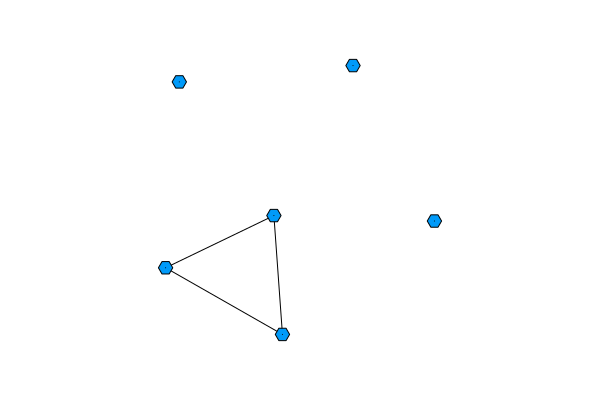

In [468]:
graphplot(g, curves=false)



In [98]:
g = wheel_graph(10); 
t = plot(g)

LoadError: Cannot convert SimpleGraph{Int64} to series data for plotting

In [99]:
using GraphPlot, Compose

┌ Info: Precompiling GraphPlot [a2cc645c-3eea-5389-862e-a155d0052231]
└ @ Base loading.jl:1664
┌ Warning: Module DataStructures with build ID 1292585244713769 is missing from the cache.
│ This may mean DataStructures [864edb3b-99cc-5e75-8d2d-829cb0a9cfe8] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1325
┌ Warning: Module DataStructures with build ID 1292585244713769 is missing from the cache.
│ This may mean DataStructures [864edb3b-99cc-5e75-8d2d-829cb0a9cfe8] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1325
┌ Info: Skipping precompilation since __precompile__(false). Importing GraphPlot [a2cc645c-3eea-5389-862e-a155d0052231].
└ @ Base loading.jl:1341
┌ Info: Precompiling Compose [a81c6b42-2e10-5240-aca2-a61377ecd94b]
└ @ Base loading.jl:1664
┌ Warning: Module DataStructures with build ID 1292585244713769 is missing from the cache.
│ This may mean DataStructures [864edb3b-99cc-5e75-8d2d-829cb

In [130]:
g = wheel_graph(10)

{10, 18} undirected simple Int64 graph

In [111]:
Pkg.add("GraphRecipes")

   Resolving package versions...
   Installed EarCut_jll ────────────────── v2.2.4+0
   Installed Ratios ────────────────────── v0.4.3
   Installed OffsetArrays ──────────────── v1.12.8
   Installed Extents ───────────────────── v0.1.1
   Installed TableTraits ───────────────── v1.0.1
   Installed NetworkLayout ─────────────── v0.4.4
   Installed GeometryTypes ─────────────── v0.8.5
   Installed GraphRecipes ──────────────── v0.5.12
   Installed DataValueInterfaces ───────── v1.0.0
   Installed Adapt ─────────────────────── v3.4.0
   Installed Tables ────────────────────── v1.10.0
   Installed AbstractTrees ─────────────── v0.4.3
   Installed IteratorInterfaceExtensions ─ v1.0.0
   Installed StructArrays ──────────────── v0.6.13
   Installed GeometryBasics ────────────── v0.4.5
   Installed AxisAlgorithms ────────────── v1.0.1
   Installed GeoInterface ──────────────── v1.0.1
   Installed WoodburyMatrices ──────────── v0.5.5
   Installed Interpolations ────────────── v0.14.6
    Updati

In [112]:
using Plots, GraphRecipes


┌ Info: Precompiling GraphRecipes [bd48cda9-67a9-57be-86fa-5b3c104eda73]
└ @ Base loading.jl:1664
┌ Warning: Module Graphs with build ID 7888627820951 is missing from the cache.
│ This may mean Graphs [86223c79-3864-5bf0-83f7-82e725a168b6] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1325
┌ Info: Skipping precompilation since __precompile__(false). Importing GraphRecipes [bd48cda9-67a9-57be-86fa-5b3c104eda73].
└ @ Base loading.jl:1341
┌ Info: Precompiling GeometryTypes [4d00f742-c7ba-57c2-abde-4428a4b178cb]
└ @ Base loading.jl:1664
┌ Warning: Module StaticArrays with build ID 1292586948797484 is missing from the cache.
│ This may mean StaticArrays [90137ffa-7385-5640-81b9-e52037218182] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1325
┌ Info: Skipping precompilation since __precompile__(false). Importing GeometryTypes [4d00f742-c7ba-57c2-abde-4428a4b178cb].
└ @ Base loading.jl:1341
┌ Info: Preco

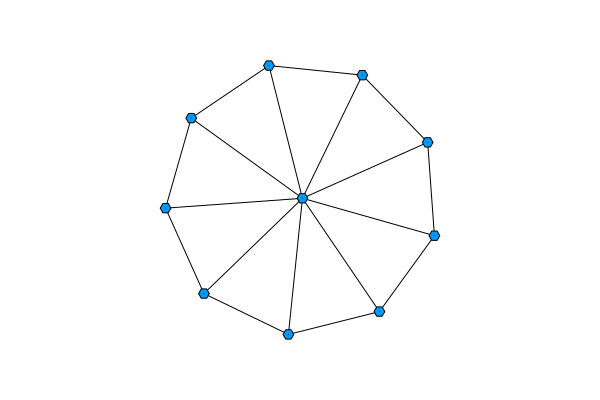

In [131]:
graphplot(g, curves=false)
